# **Métrica Ponderada para Representatividad Distributiva**
## **Guía de Uso General**

### **¿Qué hace esta herramienta?**

Esta herramienta calcula una **métrica de tendencia central ponderada** que es más robusta que la media aritmética simple para distribuciones asimétricas. Es especialmente útil para:

- 📊 **Datos de ingresos** y variables económicas
- 🏥 **Tiempos de espera** y datos médicos  
- 🌐 **Datos web** (tiempo de respuesta, tráfico)
- 📈 **Datos financieros** (precios, rendimientos)
- 🔬 **Cualquier distribución asimétrica**

### **¿Cómo funciona?**

1. **Analiza automáticamente** las características de tu distribución
2. **Detecta el nivel de asimetría** (baja, moderada, alta)
3. **Selecciona los parámetros óptimos** según las características detectadas
4. **Combina inteligentemente** media, mediana y moda (cuando es apropiado)
5. **Proporciona una métrica más representativa** que la media simple

### **Ventajas principales:**

✅ **Más robusta** ante valores extremos  
✅ **Se adapta automáticamente** a diferentes tipos de distribuciones  
✅ **Fácil de usar** - solo necesitas tus datos  
✅ **Respaldo matemático sólido** con validación estadística  
✅ **Interpretable** - explica por qué eligió cada configuración

In [1]:
# ========== CONFIGURACIÓN INICIAL ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importar nuestras funciones desarrolladas
from defs import *
from funciones_aux import *

## **Paso 1: Cargar tus datos** 📂

### **¡IMPORTANTE! Elige UNA opción:**

🎯 **¿Tienes tus propios datos para analizar?** 
- ✅ **SÍ** → Usa la **Opción 1** (CSV/Excel) o **Opción 2** (Lista) con tus datos reales
- ❌ **NO** → Usa la **Opción 2** (Datos de ejemplo) para explorar la herramienta

**⚠️ Los datos que elijas en este paso se usarán en TODO el análisis posterior.**

Elige **SOLO UNA** de las siguientes opciones:

In [2]:
# ========== OPCIÓN 1: CARGAR DESDE ARCHIVO CSV/EXCEL ==========
datos, df = cargar_datos_desde_archivo('insumos/ENOE_SDEMT423.csv', columna='ing_x_hrs')

✅ Archivo CSV cargado: insumos/ENOE_SDEMT423.csv
📊 Dimensiones: 419983 filas, 114 columnas
📋 Columnas disponibles: ['r_def', 'loc', 'mun', 'est', 'est_d_tri', 'est_d_men', 'ageb', 't_loc_tri', 't_loc_men', 'cd_a', 'ent', 'con', 'upm', 'd_sem', 'n_pro_viv', 'v_sel', 'n_hog', 'h_mud', 'n_ent', 'per', 'n_ren', 'c_res', 'par_c', 'sex', 'eda', 'nac_dia', 'nac_mes', 'nac_anio', 'l_nac_c', 'cs_p12', 'cs_p13_1', 'cs_p13_2', 'cs_p14_c', 'cs_p15', 'cs_p16', 'cs_p17', 'n_hij', 'e_con', 'cs_p20a_1', 'cs_p20a_c', 'cs_p20b_1', 'cs_p20b_c', 'cs_p20c_1', 'cs_ad_mot', 'cs_p21_des', 'cs_ad_des', 'cs_nr_mot', 'cs_p23_des', 'cs_nr_ori', 'ur', 'zona', 'salario', 'fac_tri', 'fac_men', 'clase1', 'clase2', 'clase3', 'pos_ocu', 'seg_soc', 'rama', 'c_ocu11c', 'ing7c', 'dur9c', 'emple7c', 'medica5c', 'buscar5c', 'rama_est1', 'rama_est2', 'dur_est', 'ambito1', 'ambito2', 'tue1', 'tue2', 'tue3', 'busqueda', 'd_ant_lab', 'd_cexp_est', 'dur_des', 'sub_o', 's_clasifi', 'remune2c', 'pre_asa', 'tip_con', 'dispo', 'nodi

In [3]:
# ========== OPCIÓN 2: GENERAR DATOS DE EJEMPLO ==========
# Puedes escoger entre varias distribuciones: "ingresos", "tiempos", "precios",
#                                            "asimetrico_alto", "normal"
datos, nombre_datos, unidad = generar_datos_ejemplo("ingresos", n=1000)
datos_origen = "ejemplo_ingresos"

print(f"✅ Usando: {nombre_datos}")
print(f"📊 {len(datos)} observaciones listas para analizar")
print(f"📈 Estos datos se usarán en TODO el análisis posterior")

✅ Datos generados: Distribución de Ingresos (log-normal)
📊 Observaciones: 1000
📈 Rango: 1647.45 - 480309.13 pesos
✅ Usando: Distribución de Ingresos (log-normal)
📊 1000 observaciones listas para analizar
📈 Estos datos se usarán en TODO el análisis posterior


## **Paso 1.5: Limpieza de Datos (Opcional)** 🧹

### **¿Necesitas limpiar tus datos antes del análisis?**

Esta celda te permite **filtrar y limpiar** tus datos si es necesario. Es especialmente útil para:

- 🚫 **Remover valores nulos** (NaN, None)
- 🔢 **Filtrar ceros** (si no son válidos en tu contexto)
- 📊 **Eliminar valores negativos** (para variables que solo deben ser positivas)
- 🎯 **Filtrar outliers extremos** (percentiles muy altos/bajos)
- 📋 **Aplicar filtros personalizados** según tu dominio

**⚠️ Solo ejecuta esta celda si necesitas limpiar tus datos. Si tus datos ya están limpios, salta al Paso 2.**

In [4]:
# ========== LIMPIEZA DE DATOS OPCIONAL ==========
# Puedes activar/desactivar cada limpieza con True/False según lo que necesites

datos_limpios = limpiar_datos(
    datos,
    limpiar_nulos=True,         # Eliminar datos vacíos (NaN, None)
    limpiar_ceros=False,        # Eliminar ceros (útil para ingresos, precios, etc.)
    limpiar_negativos=True,     # Eliminar valores negativos (útil para variables que deben ser positivas)
    limpiar_outliers=False,     # Eliminar outliers extremos (percentiles, ver abajo)
    percentil_inferior=1,       # Percentil inferior para outliers (solo si limpiar_outliers=True)
    percentil_superior=99,      # Percentil superior para outliers (solo si limpiar_outliers=True)
    limpiar_personalizado=False,# Aplicar filtro personalizado de rango (ver abajo)
    valor_min=None,             # Valor mínimo permitido (solo si limpiar_personalizado=True)
    valor_max=None,             # Valor máximo permitido (solo si limpiar_personalizado=True)
    verbose=True                # Mostrar mensajes y resumen de limpieza
)



📊 DATOS ORIGINALES:
   • Observaciones: 1,000
   • Rango: 1647.45 - 480309.13
   • Valores nulos: 0
   • Valores cero: 0
   • Valores negativos: 0

🛠️  OPCIONES DE LIMPIEZA DISPONIBLES:
✅ Valores nulos removidos: 0
✅ Valores negativos removidos: 0

📊 NO SE APLICARON FILTROS
   • Los datos originales se mantienen sin cambios

📊 ESTADÍSTICAS FINALES DE LOS DATOS (post-limpieza)
• Media aritmética: 30,721.252
• Mediana: 22,476.839
• Desviación estándar: 30,825.965
• Asimetría (momentos): 4.960
• Curtosis (momentos): 51.101
• Coeficiente de variación: 1.003

✅ DATOS FINALES LISTOS PARA ANÁLISIS:
   • Observaciones: 1,000
   • Rango: 1647.45 - 480309.13
   • Estos datos se usarán en el análisis automático

🚀 Continúa con el PASO 2 (Análisis Automático)


## **Paso 2: Análisis Automático** 🤖

**¡Esta es la parte principal!** La función `metrica_ajustada()` analizará automáticamente tus datos y:

1. 🔍 **Detectará** el nivel de asimetría  
2. ⚙️ **Seleccionará** los parámetros óptimos  
3. 📊 **Calculará** la métrica ponderada  
4. 📋 **Explicará** todas las decisiones tomadas  

**Solo ejecuta la celda siguiente y obtén resultados completos:**

*Nota: Si aplicaste limpieza en el Paso 1.5, se usarán automáticamente los datos limpios.*

In [5]:
# ========== ANÁLISIS AUTOMÁTICO COMPLETO ==========
resultado_final = analizar_datos_completo(datos, nombre_datos="Mi análisis")

🚀 INICIANDO ANÁLISIS AUTOMÁTICO
📊 ANALIZANDO: Mi análisis
📈 Observaciones: 1,000
📈 Rango: 1647.45 - 480309.13

🤖 EJECUTANDO ANÁLISIS AUTOMÁTICO...
------------------------------------------------------------
✅ ANÁLISIS COMPLETADO EXITOSAMENTE


## **Paso 3: Visualizaciones Automáticas** 📊

Las visualizaciones te ayudarán a **entender mejor** los resultados y **validar** las decisiones del algoritmo automático.

📊 CREANDO VISUALIZACIONES PARA: Distribución de Ingresos (log-normal)


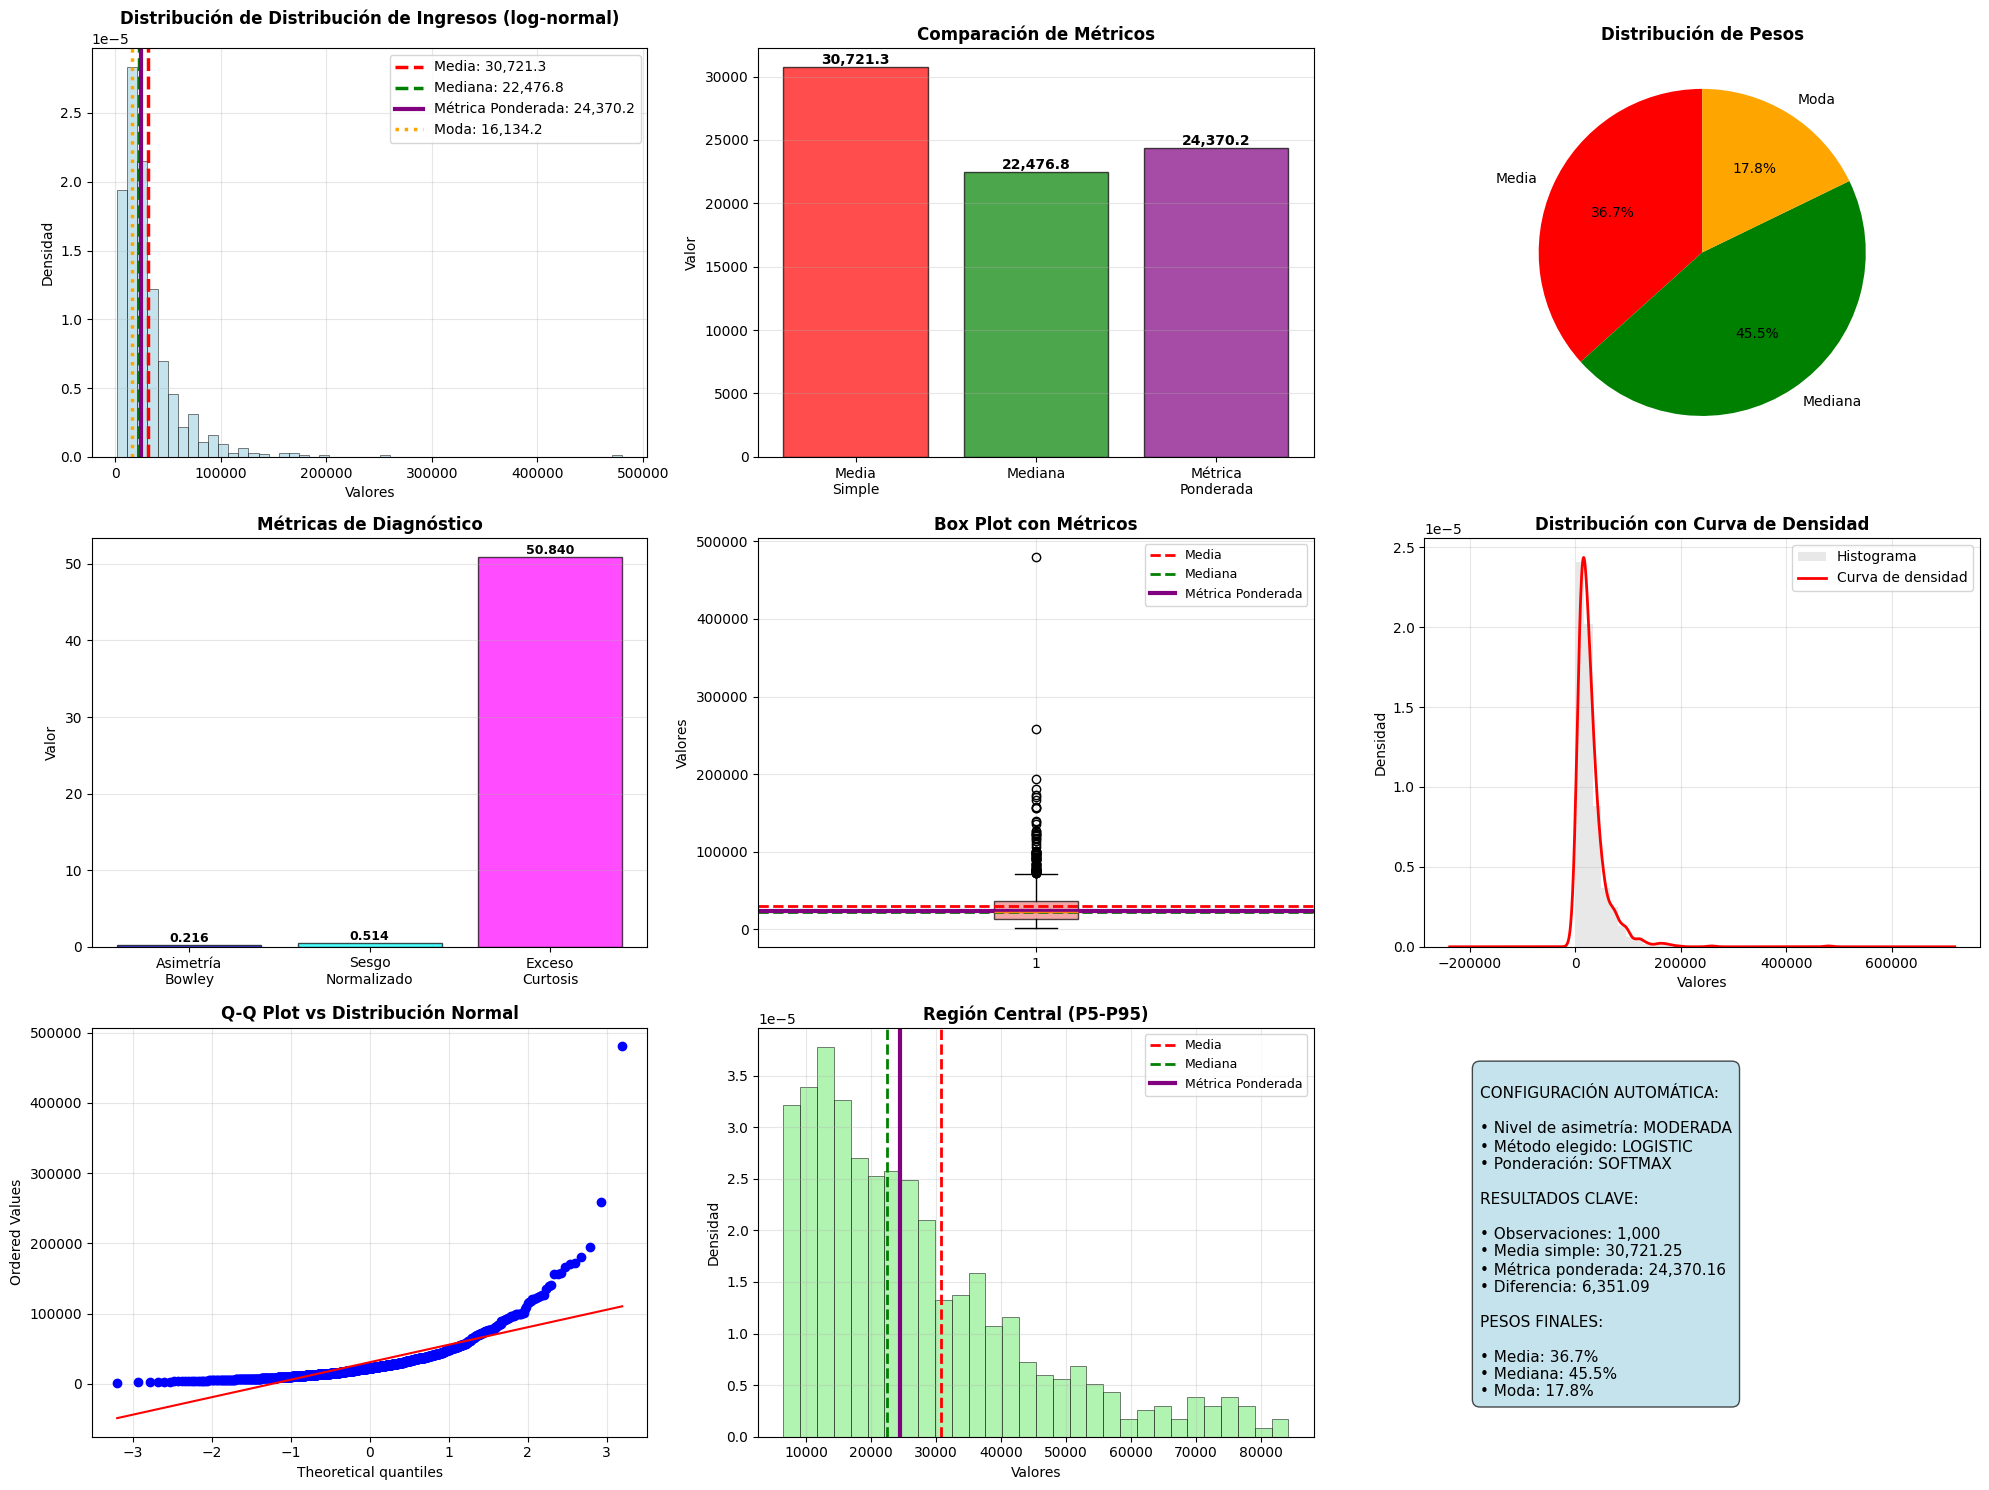

✅ Visualizaciones creadas exitosamente
📊 Interpretación:
   🟡 Tu distribución tiene asimetría moderada - la métrica ponderada mejora la representatividad


In [6]:
# ========== VISUALIZACIONES COMPREHENSIVAS ==========
crear_visualizaciones(datos, resultado_final, nombre_datos)

## **Paso 4: Uso Avanzado (Opcional)** ⚙️

Si quieres **mayor control** sobre el análisis, puedes usar la función `metrica_ponderada()` directamente con parámetros personalizados.

**EJEMPLOS DE CONFIGURACIÓN**
- #### Conservadora:
method="linear", incluir_moda=False, use_kurtosis=False, use_bowley=False, temperature=1.0, clip=(0.1, 0.9)
- #### Agresiva:
method="exponential", incluir_moda=True, moda_robusta=True, use_kurtosis=True, use_bowley=True, weight_method="convex", temperature=0.3, clip=(0.01, 0.99)
- #### Solo mediana:
method="linear", incluir_moda=False, temperature=0.1, s_max=0.1
- #### Finanzas:
method="logistic", usar_medida_robusta=True, incluir_moda=False, use_kurtosis=True, use_bowley=True, temperature=0.5, alpha=1.0, clip=(0.05, 0.95)

⚙️  COMPARACIÓN AVANZADA DE MÉTRICAS
   • Resultado: 23468.341
   • Peso media: 0.342
   • Peso mediana: 0.370
   • Peso moda: 0.288

📊 COMPARACIÓN DE CONFIGURACIONES:
----------------------------------------------------------------------
   • Automática     :  24370.158
   • Personalizada  :  23468.341
   • Media Simple   :  30721.252
   • Mediana Simple :  22476.839


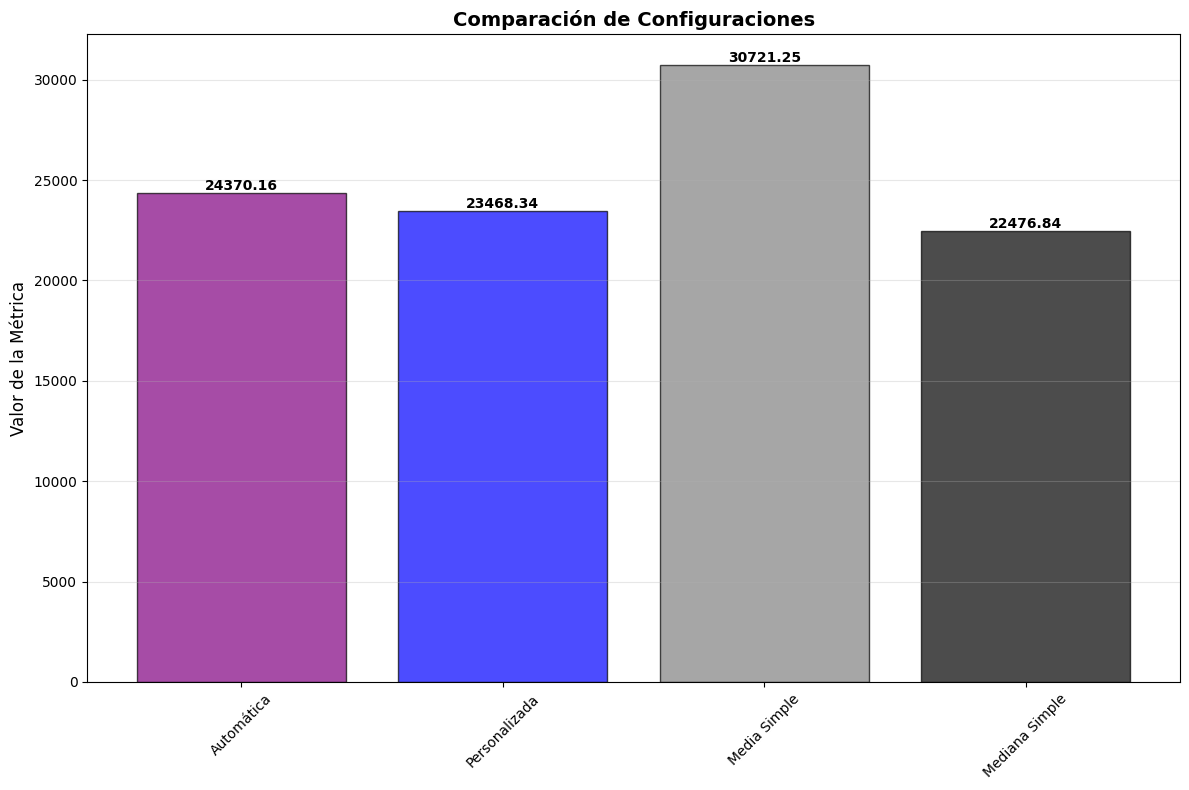

In [7]:
# ========== USO AVANZADO CON PARÁMETROS PERSONALIZADOS ==========

# Cambia aquí los parámetros según tu necesidad
resultado_personalizado = ejecutar_comparacion_avanzada(
    datos,
    resultado_final=resultado_final,
    method="exponential",      
    incluir_moda=True,
    moda_robusta=True,
    use_kurtosis=True,
    use_bowley=True,
    weight_method="convex",
    temperature=0.3,
    clip=(0.01, 0.99)
)

## **Paso 5: Resumen y Exportación** 📋

### **Resumen de tus resultados**

Si has ejecutado todas las celdas anteriores, ahora tienes:

✅ **Análisis automático completo** de tu distribución  
✅ **Métrica ponderada optimizada** más robusta que la media simple  
✅ **Visualizaciones comprehensivas** para entender los resultados  
✅ **Comparación con diferentes configuraciones** (si ejecutaste el uso avanzado)  

### **¿Qué hacer con los resultados?**

1. **Usa la métrica ponderada** en lugar de la media simple para tus análisis
2. **Documenta la metodología** - tienes respaldo matemático sólido
3. **Valida con diferentes configuraciones** si es crítico
4. **Aplica a otros datasets** similares con confianza

### **Exportar resultados:**

In [8]:
# ========== FUNCIÓN DE EXPORTACIÓN Y RESUMEN FINAL ==========
exportar_resultados(datos, resultado_final, 
                    nombre_archivo="mi_exportacion",  #elegir nombre de archivo de salida
                    exportar_json=False,              # exportar a formato JSON
                    exportar_csv=True,                 # exportar a formato CSV
                    exportar_txt=False,                # exportar a formato TXT
                    mostrar_resumen=True)              # mostrar resumen de resultados

📊 RESUMEN FINAL DE RESULTADOS:
--------------------------------------------------
🎯 MÉTRICA PONDERADA RECOMENDADA: 24,370.158
📈 vs Media simple: 30,721.252
💰 Diferencia absoluta: 6,351.094
📊 Diferencia relativa: 20.67%

⚙️  CONFIGURACIÓN AUTOMÁTICA ELEGIDA:
   • Nivel de asimetría: MODERADA
   • Método: LOGISTIC
   • Ponderación: SOFTMAX

⚖️  DISTRIBUCIÓN DE PESOS:
   • Media: 36.7%
   • Mediana: 45.5%
   • Moda: 17.8%
✅ Tabla de resultados guardada en: mi_exportacion.csv

🎯 PRÓXIMOS PASOS RECOMENDADOS:
--------------------------------------------------
1. Usa la métrica ponderada en tus análisis futuros
2. Documenta la metodología en tus reportes
3. Aplica la misma herramienta a datasets similares
4. Comparte los archivos generados con tu equipo

🔴 NOTA IMPORTANTE:
   La diferencia entre la métrica ponderada y la media simple es significativa.
   Considera usar la métrica ponderada para decisiones importantes.


{'Análisis': {'Observaciones': 1000,
  'Rango_min': 1647.4536425856265,
  'Rango_max': 480309.12812621397,
  'Media_simple': 30721.251920689803,
  'Mediana': 22476.83921307671,
  'Desviacion_std': 30825.965000770248,
  'Asimetria_momentos': 4.959714062983996,
  'Curtosis_momentos': 51.10149432374739},
 'Diagnostico_automatico': {'Nivel_asimetria': 'moderada',
  'Asimetria_Bowley': 0.21598269685736438,
  'Sesgo_normalizado': 0.5141822816800324,
  'Exceso_curtosis': 50.84035030144489,
  'Curtosis_significativa': np.True_,
  'Usar_moda': True,
  'Moda_robusta': True},
 'Configuracion_elegida': {'method': 'logistic',
  'weight_method': 'softmax',
  'convex_method': 'inverse_distance',
  'usar_medida_robusta': np.True_,
  'use_kurtosis': np.True_,
  'use_bowley': np.True_,
  'temperature': 0.5,
  'alpha': 0.693,
  's0': 1.0,
  'p': 3.0,
  's_max': 2.0,
  'shrink_c': 200.0,
  'clip': (0.05, 0.95)},
 'Resultados_finales': {'Media_aritmetica': 30721.251920689803,
  'Mediana': 22476.83921307671

## **Documentación y Referencias** 📚

### **¿Qué acabas de usar?**

Has utilizado un **sistema avanzado de análisis estadístico** que implementa:

- **📊 Estimación robusta de la moda** mediante Kernel Density Estimation (KDE)
- **📈 Medidas de asimetría robustas** (Bowley skewness)  
- **⚖️ Ponderación adaptativa** con múltiples métodos (softmax, convex weights)
- **🤖 Sistema de decisión automática** basado en características de la distribución
- **🛡️ Validación de robustez** ante valores extremos

### **Fundamentos matemáticos:**

1. **MADN (Median Absolute Deviation Normalized)**: `1.4826 × median(|x - median(x)|)`
2. **Asimetría de Bowley**: `(Q₃ + Q₁ - 2Q₂) / (Q₃ - Q₁)`
3. **Ponderación softmax**: `wᵢ = exp(-dᵢ/T) / Σexp(-dⱼ/T)`
4. **Mapeo logístico**: `w = 1 / (1 + (s/s₀)ᵖ)`

### **Casos de uso recomendados:**

✅ **Datos de ingresos** y salarios  
✅ **Precios** y variables financieras  
✅ **Tiempos** de espera o respuesta  
✅ **Cualquier distribución asimétrica** con valores extremos  
✅ **Análisis de políticas públicas**  
✅ **Investigación académica**  

### **Referencias académicas:**

- Bowley, A.L. (1920). *Elements of Statistics*
- Rousseeuw, P.J. & Croux, C. (1993). "Alternatives to the median absolute deviation"
- Silverman, B.W. (1986). *Density Estimation for Statistics and Data Analysis*
- Maronna, R.A. et al. (2019). *Robust Statistics: Theory and Methods*

### **Soporte y contacto:**

Para preguntas técnicas o mejoras, contacta al desarrollador del sistema: https://github.com/AGAYON

---

**¡Gracias por usar la herramienta de Métrica Ponderada para Representatividad Distributiva!** 🎉